In [3]:
import numpy as np
import httplib2
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.python.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt

In [4]:
SIZE = 224

In [5]:
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")
train, _ = tfds.load('cats_vs_dogs', split=["train[:100%]"], with_info=True, as_supervised=True)

In [6]:
def resize_image(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (SIZE, SIZE))
  image = image / 255.0
  return image, label

In [7]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [8]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

In [9]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(train_batches, epochs=2)

In [13]:
model.save("cats_vs_dogs")

INFO:tensorflow:Assets written to: cats_vs_dogs\assets


INFO:tensorflow:Assets written to: cats_vs_dogs\assets


In [14]:
def download_image(link):
  h = httplib2.Http('.cache')
  response, content = h.request(link)
  out = open('test.jpg', 'wb')
  out.write(content)
  out.close()

1/1 [==============================] - 1s 680ms/step


Text(0.5, 1.0, 'СОБАКА 10.801580429077148')

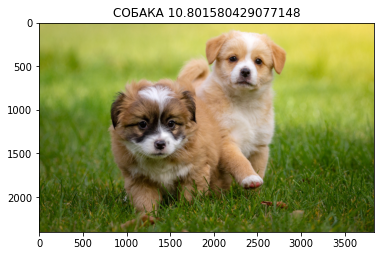

In [15]:
download_image("https://wallpapersgood.ru/wallpapers/main2/201733/15028196745993355a46e9b0.25089295.jpg")
img = tf.keras.preprocessing.image.load_img('test.jpg')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
pred_label = 'КОТ' if prediction < 0.5 else 'СОБАКА'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')